## Bernstein-vazirani algorihm.
We follow the same steps and principle from DJ algorithm to solve a different problem this time. 
Now we have a function which returns the bitwise product of the input with some string s. 
In other words given an input x. f(x)= s.x.
Classically it would require n queries, but here we do it with one query of oracle.
The magic happens here:
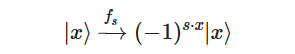
When x=s , it returns 0. Thus the amplitude of |s> would be one, and the normilization conditions instates the amplitude for other term to be zero. 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit,transpile
from qiskit.circuit import ClassicalRegister,QuantumRegister 
from qiskit.visualization import plot_histogram

In [9]:
n = 4 ###number of qubuits of s
s='1000'  #the secret string

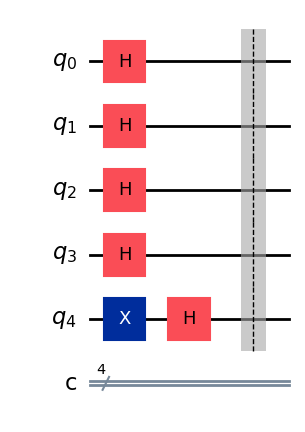

In [16]:
##building the cicruit 
bvCircuit = QuantumCircuit(n+1,n) # +1 for ancilla bits and n classical bits to collapse the output to

## putting the last qubit in |-> state
bvCircuit.x(n)
bvCircuit.h(n)

## applying hadamard to rest of qubits
for i in range(n):
    bvCircuit.h(i)
#barrier 
bvCircuit.barrier()

bvCircuit.draw('mpl')



0001


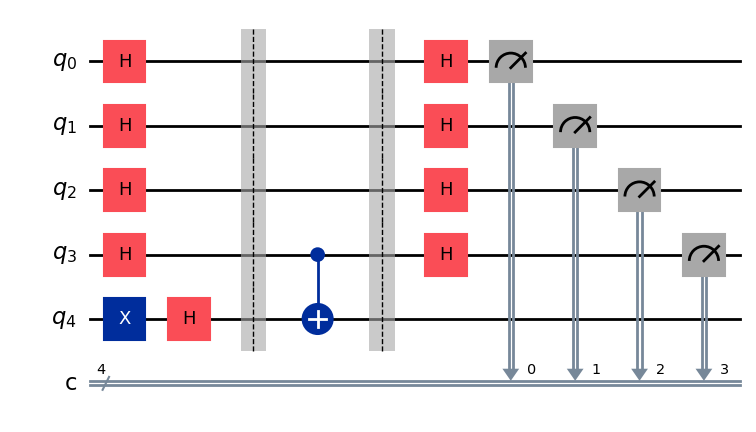

In [17]:
## applying the oracle now
s=s[::-1]
print(s)
for q in range(n):
    if s[q]=='1':
       #bvCircuit.i(q)
    #else:
        bvCircuit.cx(q,n)
bvCircuit.barrier()

## applying hadamard again
for i in range(n):
    bvCircuit.h(i)

#measurement
for i in range(n):
    bvCircuit.measure(i,i)

bvCircuit.draw('mpl')

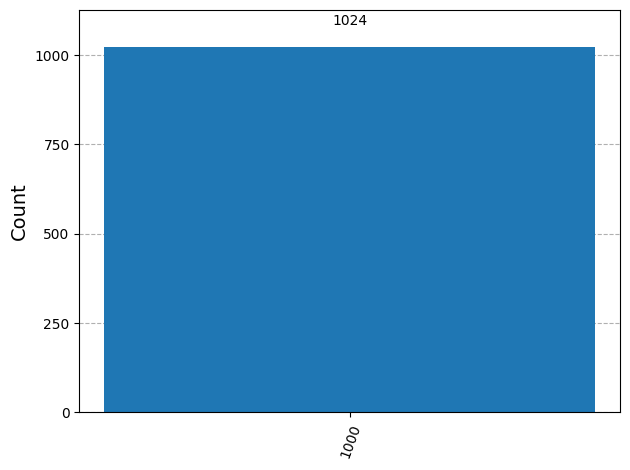

In [18]:
#running circuit on a simulator
aer_sim = Aer.get_backend('aer_simulator')
results= aer_sim.run(bvCircuit).result()
answer= results.get_counts()

plot_histogram(answer)